In [3347]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, RidgeCV, Lasso, \
LassoCV, ElasticNet, ElasticNetCV
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, precision_score, silhouette_score, plot_confusion_matrix, classification_report, f1_score, roc_auc_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor, ExtraTreesRegressor, ExtraTreesClassifier, RandomForestClassifier, BaggingClassifier
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.svm import SVR, SVC
from sklearn.decomposition import PCA
from sklearn.naive_bayes import MultinomialNB, BernoulliNB

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score
from sklearn.feature_selection import f_classif

In [3348]:
twenty_stats = pd.read_csv('./datasets/twenty_STATS.csv')
nineteen_stats = pd.read_csv('./datasets/nineteen_STATS.csv')
eighteen_stats =  pd.read_csv('./datasets/eighteen_STATS.csv')
seventeen_stats = pd.read_csv('./datasets/seventeen_STATS.csv')
sixteen_stats = pd.read_csv('./datasets/sixteen_STATS.csv')
fifteen_stats = pd.read_csv('./datasets/fifteen_STATS.csv')
fourteen_stats = pd.read_csv('./datasets/fourteen_STATS.csv')
thirteen_stats = pd.read_csv('./datasets/thirteen_STATS.csv')
twelve_stats = pd.read_csv('./datasets/twelve_STATS.csv')
eleven_stats = pd.read_csv('./datasets/eleven_STATS.csv')


eleven_salary = pd.read_csv('./datasets/eleven_salary.csv')
twelve_salary = pd.read_csv('./datasets/twelve_salary.csv')
thirtheen_salary = pd.read_csv('./datasets/thirtheen_salary.csv')
fourteen_salary = pd.read_csv('./datasets/fourteen_salary.csv')
fifteen_salary = pd.read_csv('./datasets/fifteen_salary.csv')
sixteen_salary = pd.read_csv('./datasets/sixteen_salary.csv')
seventeen_salary = pd.read_csv('./datasets/seventeen_salary.csv')
eighteen_salary = pd.read_csv('./datasets/eighteen_salary.csv')
twenty_salary = pd.read_csv('./datasets/twenty_salary_cond.csv')


twenty_stats_and_sal = pd.read_csv('./datasets/twenty_stats_and_sal.csv')
sixteen_to_twenty_with_sal = pd.read_csv('./datasets/sixteen_to_twenty_with_sal.csv')
seventeen_to_twenty_with_sal = pd.read_csv('./datasets/seventeen_to_twenty_with_sal.csv')
eleven_to_fifteen_with_sal = pd.read_csv('./datasets/eleven_to_fifteen_with_sal.csv')
twelve_to_sixteen_with_sal = pd.read_csv('./datasets/twelve_to_sixteen_with_sal.csv')
thirteen_to_seventeen_with_sal = pd.read_csv('./datasets/thirteen_to_seventeen_with_sal.csv')
fourteen_to_eighteen_with_sal = pd.read_csv('./datasets/fourteen_to_eighteen_with_sal.csv')


In [3349]:
sixteen_to_twenty_with_sal['2019-20'].mean()

12864602.87735849

In [3350]:
fourteen_to_eighteen_with_sal['salary'].mean()

11423608.302857142

In [3351]:
thirteen_to_seventeen_with_sal['salary'].mean()

9642214.25773196

In [3352]:
logreg = LogisticRegression(max_iter=100000)
knnc = KNeighborsClassifier()
dt = DecisionTreeClassifier()
bc = BaggingClassifier()
rf = RandomForestClassifier()
svc = SVC()
et = ExtraTreesClassifier()
nb = MultinomialNB()

# First Classification Model(s)

# Sixteen to Twenty with Sal

In [3353]:
sixteen_to_twenty_with_sal.corr()['2019-20'].sort_values(ascending=False)

2019-20    1.000000
PTS        0.777871
FG         0.767685
FGA        0.747993
MP         0.738304
FT         0.706744
GS         0.697379
FTA        0.696733
2PA        0.684865
TOV        0.677175
2P         0.676427
AST        0.567211
STL        0.554729
DRB        0.544989
TRB        0.466665
3PA        0.428419
3P         0.423755
PF         0.376320
G          0.323772
BLK        0.271867
FT%        0.246529
ORB        0.224346
3P%        0.157425
2P%        0.134902
eFG%       0.133224
FG%        0.128468
Rk        -0.018450
Age       -0.048687
Name: 2019-20, dtype: float64

In [3354]:
fourteen_to_eighteen_with_sal.corr()['salary'].sort_values(ascending=False)

salary    1.000000
FG        0.617357
PTS       0.615628
MP        0.615202
2P        0.587224
FTA       0.585406
GS        0.585200
FT        0.568590
2PA       0.550413
DRB       0.549983
FGA       0.547012
TRB       0.518104
TOV       0.465958
PF        0.447768
STL       0.419682
BLK       0.406129
ORB       0.380921
G         0.369519
FG%       0.344509
AST       0.328249
2P%       0.284784
eFG%      0.272467
3P        0.150277
3PA       0.129058
FT%      -0.032867
3P%      -0.040347
Rk       -0.137340
Age      -0.144360
Name: salary, dtype: float64

In [3355]:
thirteen_to_seventeen_with_sal.corr()['salary'].sort_values(ascending=False)

salary    1.000000
FG        0.708810
PTS       0.699907
2P        0.681661
MP        0.680771
FTA       0.671796
2PA       0.652838
FT        0.649479
FGA       0.648293
GS        0.645105
DRB       0.601488
TRB       0.553681
TOV       0.516202
STL       0.429546
ORB       0.376394
BLK       0.370468
PF        0.349152
AST       0.322106
G         0.316028
FG%       0.301223
2P%       0.246688
eFG%      0.242879
3P        0.159262
3PA       0.154435
FT%       0.034787
3P%      -0.052526
Rk       -0.090905
Age      -0.112251
Name: salary, dtype: float64

In [3356]:
u = sixteen_to_twenty_with_sal.describe(percentiles=[0.2,0.4,0.6,0.8])
u
#assigning classes based on quartiles: 20%, 40%, 60%, 80%

,Rk,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,2019-20
count,212.000000,212.000000,212.000000,212.00000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,...,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,2.120000e+02
mean,261.674528,27.090566,62.142453,37.05566,24.973302,4.265000,9.264245,0.460356,1.114151,3.096038,...,1.074434,3.594528,4.664811,2.535472,0.819717,0.510849,1.445943,2.027830,11.599717,1.286460e+07
std,151.696450,3.559448,11.309950,23.08560,6.366613,1.974486,4.185321,0.060940,0.792928,2.073500,...,0.823630,1.753289,2.445914,1.857344,0.376633,0.431623,0.747863,0.543607,5.621677,1.018687e+07
min,1.000000,21.000000,16.200000,0.40000,7.720000,0.720000,2.040000,0.320400,0.000000,0.000000,...,0.160000,1.040000,1.180000,0.340000,0.100000,0.020000,0.260000,0.800000,1.920000,1.962880e+05
20%,115.400000,24.000000,54.240000,12.80000,19.208000,2.540000,5.648000,0.411560,0.340000,1.004000,...,0.440000,2.164000,2.724000,1.064000,0.500000,0.200000,0.860000,1.560000,6.860000,2.564753e+06
40%,205.600000,26.000000,60.880000,27.64000,22.936000,3.388000,7.388000,0.437200,0.880000,2.476000,...,0.660000,2.740000,3.556000,1.540000,0.680000,0.320000,1.100000,1.868000,9.084000,8.000000e+06
50%,258.000000,27.000000,63.400000,33.20000,25.190000,3.820000,8.230000,0.448200,1.060000,3.000000,...,0.780000,3.200000,4.070000,1.880000,0.760000,0.380000,1.250000,2.010000,10.040000,1.070500e+07
60%,302.600000,28.000000,66.800000,45.88000,27.340000,4.400000,9.640000,0.460600,1.300000,3.532000,...,0.980000,3.560000,4.752000,2.400000,0.840000,0.440000,1.480000,2.152000,11.792000,1.315527e+07
80%,419.600000,30.000000,71.960000,62.00000,30.972000,5.872000,13.072000,0.496400,1.720000,4.720000,...,1.640000,4.532000,6.284000,3.908000,1.080000,0.736000,2.000000,2.516000,16.268000,2.314040e+07
max,527.000000,41.000000,79.800000,76.20000,36.640000,9.960000,21.180000,0.673800,4.180000,10.580000,...,4.820000,10.260000,15.080000,9.760000,1.880000,2.460000,4.840000,3.360000,31.780000,4.023176e+07


In [3357]:
u1 = thirteen_to_seventeen_with_sal.describe(percentiles=[0.2,0.4,0.6,0.8])
u1
#assigning classes based on quartiles: 20%, 40%, 60%, 80%

,Rk,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,salary
count,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,...,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,1.940000e+02
mean,233.180412,26.619845,66.086340,38.056701,25.218814,4.114175,9.027577,0.455613,0.819459,2.293041,...,1.101289,3.359149,4.456572,2.435052,0.816108,0.504253,1.462629,2.014820,10.963402,9.642214e+06
std,139.588119,3.516358,11.030749,25.251699,6.904900,1.814532,3.853526,0.051734,0.703791,1.814076,...,0.838901,1.665789,2.374173,1.898676,0.412548,0.470907,0.709042,0.518963,4.962065,6.820829e+06
min,1.000000,19.250000,29.750000,0.000000,9.750000,1.000000,2.325000,0.339500,0.000000,0.000000,...,0.125000,1.025000,1.275000,0.225000,0.150000,0.000000,0.200000,0.625000,2.800000,5.767200e+04
20%,90.600000,23.500000,58.550000,10.500000,18.290000,2.580000,5.565000,0.416650,0.090000,0.315000,...,0.375000,2.050000,2.470000,0.950000,0.475000,0.175000,0.850000,1.575000,6.540000,3.566169e+06
40%,187.400000,25.500000,65.250000,27.800000,23.505000,3.280000,7.415000,0.434750,0.575000,1.750000,...,0.650000,2.630000,3.455000,1.450000,0.650000,0.275000,1.135000,1.925000,8.750000,6.336418e+06
50%,228.500000,26.500000,68.375000,38.875000,25.750000,3.625000,8.187500,0.445125,0.725000,2.087500,...,0.800000,3.000000,3.825000,1.850000,0.750000,0.350000,1.325000,2.012500,9.850000,8.023250e+06
60%,267.800000,27.500000,71.200000,48.600000,27.900000,4.230000,9.615000,0.454350,0.945000,2.735000,...,1.070000,3.275000,4.315000,2.345000,0.850000,0.425000,1.500000,2.125000,11.490000,1.044829e+07
80%,386.000000,29.500000,75.750000,64.600000,32.495000,5.785000,12.610000,0.498700,1.425000,3.860000,...,1.720000,4.520000,6.285000,3.480000,1.100000,0.675000,2.070000,2.385000,15.620000,1.596649e+07
max,476.000000,37.500000,82.000000,81.250000,36.825000,9.700000,20.475000,0.683000,3.875000,8.725000,...,3.725000,8.975000,12.400000,10.150000,2.225000,2.500000,3.675000,3.775000,26.125000,3.096345e+07


In [3358]:
u2 = fourteen_to_eighteen_with_sal.describe(percentiles=[0.2,0.4,0.6,0.8])
u2
#assigning classes based on quartiles: 20%, 40%, 60%, 80%

,Rk,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,salary
count,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,...,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,1.750000e+02
mean,229.217143,26.074286,64.927619,38.200000,25.281333,4.094667,9.058857,0.450552,0.903238,2.504190,...,1.065905,3.391238,4.454476,2.436952,0.833905,0.500000,1.461143,2.020762,11.019238,1.142361e+07
std,133.559831,3.607172,13.050001,26.115179,6.988884,1.879355,4.037398,0.056156,0.721683,1.851711,...,0.851900,1.752061,2.486565,1.902443,0.413215,0.487336,0.735985,0.542963,5.117107,7.995105e+06
min,3.000000,20.000000,16.000000,0.333333,8.733333,0.933333,2.433333,0.262667,0.000000,0.000000,...,0.066667,0.833333,0.933333,0.200000,0.133333,0.000000,0.233333,0.633333,2.633333,5.767200e+04
20%,100.800000,23.000000,55.333333,10.600000,18.626667,2.366667,5.373333,0.411400,0.166667,0.500000,...,0.400000,1.860000,2.420000,0.986667,0.500000,0.166667,0.833333,1.533333,6.386667,3.980780e+06
40%,177.200000,24.600000,64.200000,25.733333,22.680000,3.206667,7.186667,0.430733,0.633333,1.966667,...,0.633333,2.540000,3.286667,1.433333,0.686667,0.253333,1.186667,1.900000,8.400000,7.536000e+06
50%,225.000000,26.000000,68.333333,36.666667,26.066667,3.566667,7.966667,0.438000,0.833333,2.466667,...,0.733333,3.033333,3.800000,1.766667,0.766667,0.333333,1.333333,2.033333,9.966667,1.000000e+07
60%,264.400000,26.000000,71.000000,50.133333,28.380000,4.233333,9.700000,0.449333,1.033333,2.946667,...,0.946667,3.446667,4.273333,2.293333,0.846667,0.400000,1.466667,2.146667,11.453333,1.258252e+07
80%,372.200000,29.000000,76.333333,66.333333,32.293333,5.866667,13.233333,0.482267,1.506667,4.033333,...,1.673333,4.520000,6.293333,3.566667,1.106667,0.766667,2.000000,2.440000,15.906667,1.854850e+07
max,476.000000,38.000000,82.000000,81.000000,38.100000,8.933333,19.900000,0.696333,4.000000,9.066667,...,4.100000,9.966667,14.133333,10.300000,2.166667,2.566667,3.866667,3.833333,25.966667,3.745715e+07


In [3359]:
sixteen_to_twenty_with_sal['sal_classified'] = ""

In [3360]:
for index, i in enumerate(sixteen_to_twenty_with_sal['2019-20']):
    if i < 2564753:
        sixteen_to_twenty_with_sal.loc[index, 'sal_classified'] = 1
    elif i < 8000000 and i >= 2564753:
           sixteen_to_twenty_with_sal.loc[index, 'sal_classified'] = 2
    elif i < 13155269 and i >= 8000000:
           sixteen_to_twenty_with_sal.loc[index, 'sal_classified'] = 3
    elif i < 23140395 and i >= 13155269:
           sixteen_to_twenty_with_sal.loc[index, 'sal_classified'] = 4
    else:
        sixteen_to_twenty_with_sal.loc[index, 'sal_classified'] = 5

#Function for the rest of the dataframes will in this format

In [3361]:
for index, i in enumerate(thirteen_to_seventeen_with_sal['salary']):
    if i < 3559779:
        thirteen_to_seventeen_with_sal.loc[index, 'sal_classified'] = 1
    elif i < 6345674 and i >= 3559779:
           thirteen_to_seventeen_with_sal.loc[index, 'sal_classified'] = 2
    elif i < 10383156 and i >= 6345674:
           thirteen_to_seventeen_with_sal.loc[index, 'sal_classified'] = 3
    elif i < 15858628 and i >= 10383156:
           thirteen_to_seventeen_with_sal.loc[index, 'sal_classified'] = 4
    else:
        thirteen_to_seventeen_with_sal.loc[index, 'sal_classified'] = 5

In [3362]:
for index, i in enumerate(fourteen_to_eighteen_with_sal['salary']):
    if i < 4112559:
        fourteen_to_eighteen_with_sal.loc[index, 'sal_classified'] = 1
    elif i < 7512000 and i >= 4112559:
           fourteen_to_eighteen_with_sal.loc[index, 'sal_classified'] = 2
    elif i < 12513397 and i >= 7512000:
           fourteen_to_eighteen_with_sal.loc[index, 'sal_classified'] = 3
    elif i < 18512000 and i >= 12513397:
           fourteen_to_eighteen_with_sal.loc[index, 'sal_classified'] = 4
    else:
        fourteen_to_eighteen_with_sal.loc[index, 'sal_classified'] = 5

Working primarily with these three years for now, may incorporate others later

In [3363]:
sixteen_to_twenty_with_sal['sal_classified'] = sixteen_to_twenty_with_sal['sal_classified'].astype(int)

In [3364]:
sixteen_to_twenty_with_sal['sal_classified'].value_counts()

2    47
5    43
3    43
4    42
1    37
Name: sal_classified, dtype: int64

In [3365]:
thirteen_to_seventeen_with_sal['sal_classified'].value_counts()

5.0    40
2.0    39
1.0    39
4.0    38
3.0    38
Name: sal_classified, dtype: int64

In [3366]:
fourteen_to_eighteen_with_sal['sal_classified'].value_counts()

1.0    36
4.0    36
5.0    36
2.0    34
3.0    33
Name: sal_classified, dtype: int64

In [3367]:
sixteen_to_twenty_with_sal.head()

,Player,Rk,Season,Pos,Age,Tm,G,GS,MP,FG,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,2019-20,sal_classified
0,Aaron Gordon,178.0,19-20,PF,22.0,ORL,71.2,61.2,30.36,5.26,...,5.22,6.92,2.64,0.82,0.66,1.48,2.06,13.98,19863636,4
1,Al Horford,228.0,19-20,C,31.0,PHI,71.4,70.2,31.04,5.54,...,5.42,7.00,4.22,0.78,1.22,1.50,1.98,13.52,28000000,5
2,Al-Farouq Aminu,9.0,19-20,PF,27.0,ORL,62.2,51.4,27.40,2.90,...,5.36,6.68,1.40,0.96,0.54,1.18,1.82,8.38,9258000,3
3,Alec Burks,80.0,19-20,SG,26.0,TOT,53.4,9.4,21.16,3.48,...,2.98,3.48,1.72,0.62,0.18,1.14,1.60,10.30,2320044,1
4,Alex Len,293.0,19-20,C,24.0,TOT,71.2,27.2,20.30,3.38,...,4.48,6.60,1.00,0.44,0.96,1.32,2.64,8.92,4160000,2


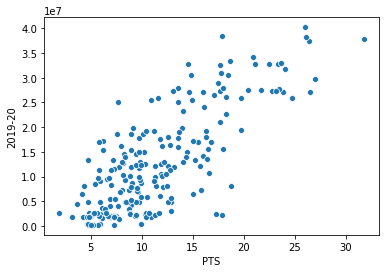

In [3368]:
sns.scatterplot(data=sixteen_to_twenty_with_sal, x='PTS', y='2019-20')
#Players with higher point per game output typically earn a higher salary

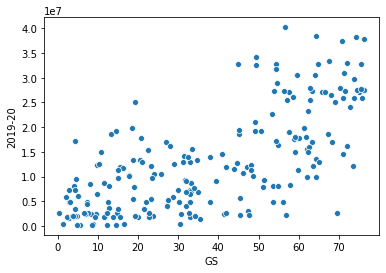

In [3369]:
sns.scatterplot(data=sixteen_to_twenty_with_sal, x='GS', y='2019-20')
#More games started, higher salary

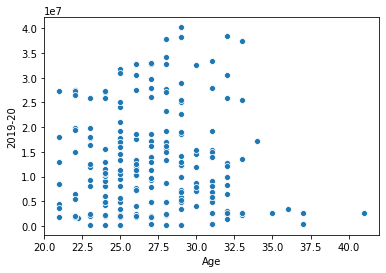

In [3370]:
sns.scatterplot(data=sixteen_to_twenty_with_sal, x='Age', y='2019-20')
#Effect age has on salary

In [3371]:
features = sixteen_to_twenty_with_sal.drop(['Age', 'Rk', 'Tm', 'Pos', 'Season', 'Player', '2019-20', 'sal_classified'], axis=1)

In [3372]:
X = features
y = sixteen_to_twenty_with_sal['sal_classified']

In [3373]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)

In [3374]:
# def fit_models_and_score(model):
#     fitting = model.fit(X_train, y_train),
#     scores = print(model.score(X_train, y_train)), print(model.score(X_test, y_test))
    
#     return scores

In [3375]:
def fit_models_and_score(model, feature_list, target, ts):
    X = feature_list
    y = target
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = ts, random_state = 42)
    fitting = model.fit(X_train, y_train),
    scores = print(f'train score is {(model.score(X_train, y_train))}'), print(f'test score is {model.score(X_test, y_test)}'),
    y_preds = model.predict(X_test),
#     precis = precision_score(y_test, y_preds, average = 'weighted')
    
    return scores

# Scoring models on 16-20 dataset

In [3376]:
fit_models_and_score(knnc, sixteen_to_twenty_with_sal[['Age', 'PTS', 'FGA', 'TRB', 'GS', 'FT', 'TOV', '3P', 'MP', '2P']], sixteen_to_twenty_with_sal['sal_classified'], 0.30)
#K nearest neighbors model

train score is 0.6081081081081081
test score is 0.453125


(None, None)

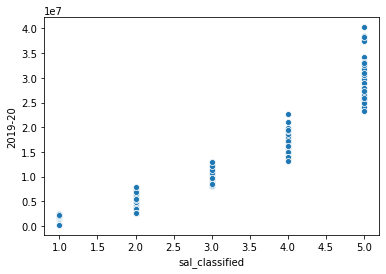

In [3377]:
sns.scatterplot(data=sixteen_to_twenty_with_sal, x='sal_classified', y='2019-20')

In [3378]:
fit_models_and_score(logreg, sixteen_to_twenty_with_sal[['Age', 'PTS', 'FGA', 'TRB', 'STL', '3P', 'GS', 'FT']], sixteen_to_twenty_with_sal['sal_classified'], 0.30)
#Logistic Regression model with some4 different features

train score is 0.581081081081081
test score is 0.578125


(None, None)

In [3379]:
fit_models_and_score(logreg, sixteen_to_twenty_with_sal[['Age', 'PTS', 'FGA', 'STL', 'TOV', '2P', '3P', 'GS', 'TRB', 'MP']], sixteen_to_twenty_with_sal['sal_classified'], 0.30)
#Logistic Regression model

train score is 0.6081081081081081
test score is 0.609375


(None, None)

In [3380]:
fit_models_and_score(dt, sixteen_to_twenty_with_sal.drop(['Age', 'Rk', 'Tm', 'Pos', 'Season', 'Player', '2019-20', 'sal_classified'], axis=1), sixteen_to_twenty_with_sal['sal_classified'], 0.30)
#Decision tree model -- severely overfit and low test score

train score is 1.0
test score is 0.421875


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\displayhook.py:275: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.
  warn('Output cache limit (currently {sz} entries) hit.\n'


(None, None)

In [3381]:
fit_models_and_score(rf, sixteen_to_twenty_with_sal.drop(['Age', 'Rk', 'Tm', 'Pos', 'Season', 'Player', '2019-20'], axis=1), sixteen_to_twenty_with_sal['sal_classified'], 0.30)
#Random forest - severely overfit

train score is 1.0
test score is 0.890625


(None, None)

In [3382]:
features = sixteen_to_twenty_with_sal[['Age', 'PTS', 'FGA', 'STL', 'TOV', '2P', '3P', 'GS', 'TRB', 'MP']]
#Since we scored models on a function, we will need to train,test, split again outside of the function in order
#to make the confusion matrix

In [3383]:
X = features 
y = sixteen_to_twenty_with_sal['sal_classified']

In [3384]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)

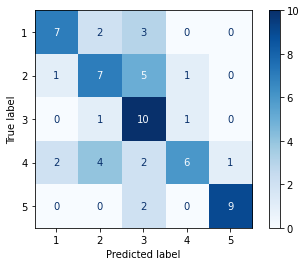

In [3385]:
plot_confusion_matrix(logreg, X_test, y_test, cmap='Blues', values_format='d');

In [3386]:
lr_grid = [
    {'penalty' : ['l2'],
      'C' : [1.0, 0.1, .05, .01],
     'solver' : ['newton-cg', 'lbfgs', 'saga']
     
        
    }
]
#Setting up for gridsearch

In [3387]:
knnc_grid = [
    {'n_neighbors': range(5, 30, 5),
    'weights': ['uniform', 'distance'],
    'p' : [1,2]}
        
    
]
#Setting up for gridsearch

In [3388]:
logreg_cv = GridSearchCV(logreg,lr_grid,cv=5)

In [3389]:
knnc_cv = GridSearchCV(knnc,knnc_grid,cv=5)

In [3390]:
fit_models_and_score(logreg_cv, sixteen_to_twenty_with_sal[['Age', 'PTS', 'FGA', 'STL', 'TOV', '2P', '3P', 'GS', 'TRB', 'MP']], sixteen_to_twenty_with_sal['sal_classified'], 0.30)
#Train lower, but test the same as before GS
#Gridsearch isn't offering much more than the default parameters

train score is 0.5337837837837838
test score is 0.609375


(None, None)

In [3391]:
fit_models_and_score(knnc_cv, sixteen_to_twenty_with_sal[['Age', 'PTS', 'FGA', 'STL', 'TOV', '2P', '3P', 'GS', 'TRB', 'MP']], sixteen_to_twenty_with_sal['sal_classified'], 0.30)
#kNN model really struggling even when trying to gridsearch for hyperparamter optimization

train score is 0.5
test score is 0.46875


(None, None)

Experimenting with fewer features

In [3392]:
fit_models_and_score(logreg, sixteen_to_twenty_with_sal[['Age', 'PTS', 'MP', 'GS', 'TRB', 'TOV']], sixteen_to_twenty_with_sal['sal_classified'], 0.35)
#Experimenting with new features

train score is 0.5474452554744526
test score is 0.5733333333333334


(None, None)

# Scoring Models on 14-18 dataset

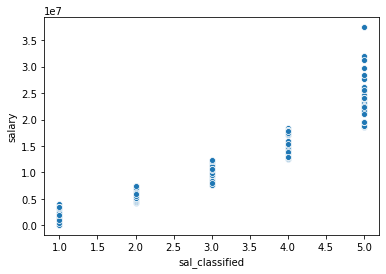

In [3393]:
sns.scatterplot(data=fourteen_to_eighteen_with_sal, x='sal_classified', y='salary')

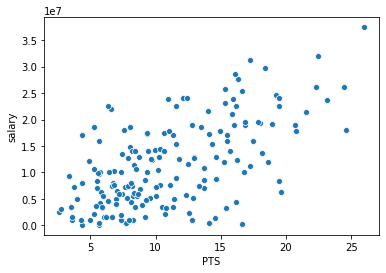

In [3394]:
sns.scatterplot(data=fourteen_to_eighteen_with_sal, x='PTS', y='salary')
#More PTS equals higher salary (generally speaking)

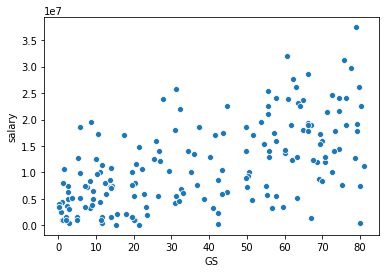

In [3395]:
sns.scatterplot(data=fourteen_to_eighteen_with_sal, x='GS', y='salary')
#More games atarted typically leads to higher salary

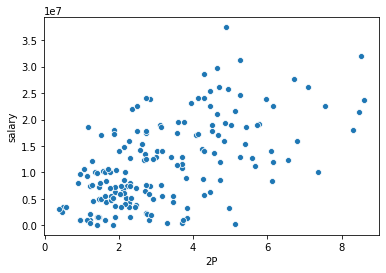

In [3396]:
sns.scatterplot(data=fourteen_to_eighteen_with_sal, x='2P', y='salary')
#More 2 point feild goals per game normally leads to higher salary, but there are some outliers

In [3397]:
fit_models_and_score(logreg, fourteen_to_eighteen_with_sal[['Age', 'FG', 'PTS', 'MP']], fourteen_to_eighteen_with_sal['sal_classified'], 0.30)
#Logistic regression model

train score is 0.4918032786885246
test score is 0.4339622641509434


(None, None)

In [3398]:
fit_models_and_score(logreg, fourteen_to_eighteen_with_sal[['Age', 'FG', 'PTS', 'MP', 'GS', 'TRB', 'BLK']], fourteen_to_eighteen_with_sal['sal_classified'], 0.30)
#Logistic regression model

train score is 0.5737704918032787
test score is 0.4528301886792453


(None, None)

In [3399]:
fit_models_and_score(logreg, fourteen_to_eighteen_with_sal[['Age', '3P%', 'FG', 'PTS', 'MP', 'GS', 'TRB', 'BLK', 'FT']], fourteen_to_eighteen_with_sal['sal_classified'], 0.30)
#Logistic regression model

train score is 0.5655737704918032
test score is 0.49056603773584906


(None, None)

In [3400]:
fit_models_and_score(knnc, fourteen_to_eighteen_with_sal[['Age', 'FG', 'PTS', 'MP']], fourteen_to_eighteen_with_sal['sal_classified'], 0.30)
#K nearest neighbors model

train score is 0.45081967213114754
test score is 0.41509433962264153


(None, None)

In [3401]:
fit_models_and_score(logreg_cv, fourteen_to_eighteen_with_sal[['Age', 'FG', 'PTS', 'MP']], fourteen_to_eighteen_with_sal['sal_classified'], 0.30)
#Logistic regression model with gridsearch

train score is 0.48360655737704916
test score is 0.39622641509433965


(None, None)

In [3402]:
fit_models_and_score(knnc_cv, fourteen_to_eighteen_with_sal[['Age', 'FG', 'PTS', 'MP']], fourteen_to_eighteen_with_sal['sal_classified'], 0.30)
#kNN with gridsearch

train score is 0.4918032786885246
test score is 0.3584905660377358


(None, None)

In [3403]:
features1 = fourteen_to_eighteen_with_sal[['Age', '3P%', 'FG', 'PTS', 'MP', 'GS', 'TRB', 'BLK', 'FT']]

In [3404]:
X = features1
y = fourteen_to_eighteen_with_sal['sal_classified']

In [3405]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)

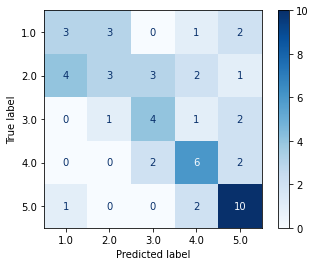

In [3406]:
plot_confusion_matrix(logreg, X_test, y_test, cmap='Blues', values_format='d');

# Scoring Models on 13-17 dataset

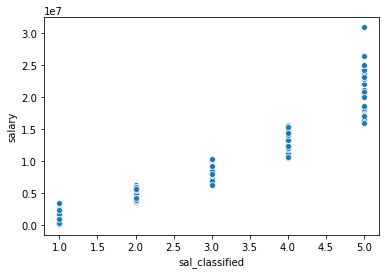

In [3407]:
sns.scatterplot(data=thirteen_to_seventeen_with_sal, x='sal_classified', y='salary')

In [3408]:
fit_models_and_score(logreg, thirteen_to_seventeen_with_sal[['MP', 'PTS', 'FG', 'FTA', '2P', 'GS']], thirteen_to_seventeen_with_sal['sal_classified'], 0.30)
#Logistric regression model

train score is 0.45185185185185184
test score is 0.4915254237288136


(None, None)

In [3409]:
fit_models_and_score(knnc, thirteen_to_seventeen_with_sal[['MP', 'PTS', 'FG', 'FTA', '2P', 'GS']], thirteen_to_seventeen_with_sal['sal_classified'], 0.30)
#kNN model

train score is 0.5185185185185185
test score is 0.3898305084745763


(None, None)

In [3410]:
fit_models_and_score(dt, thirteen_to_seventeen_with_sal[['MP', 'PTS', 'FG', 'FTA', '2P', 'GS']], thirteen_to_seventeen_with_sal['sal_classified'], 0.30)
#Decision Tree model

train score is 1.0
test score is 0.3220338983050847


(None, None)

In [3411]:
thirteen_to_seventeen_with_sal.corr()['sal_classified'].sort_values(ascending=False)

sal_classified    1.000000
salary            0.942260
MP                0.673604
FG                0.654023
PTS               0.647758
GS                0.637462
2P                0.628026
FTA               0.624318
2PA               0.609047
FT                0.607357
FGA               0.603702
DRB               0.567915
TRB               0.534853
TOV               0.500642
STL               0.430248
ORB               0.388784
PF                0.384363
G                 0.376298
BLK               0.362562
FG%               0.300108
AST               0.296975
2P%               0.233157
eFG%              0.228781
3P                0.148872
3PA               0.141375
FT%               0.034947
3P%              -0.085402
Rk               -0.088447
Age              -0.165599
Name: sal_classified, dtype: float64

In [3412]:
features2 = thirteen_to_seventeen_with_sal[['MP', 'PTS', 'FG', 'FTA', '2P', 'GS']]

In [3413]:
X = features2
y = thirteen_to_seventeen_with_sal['sal_classified']

In [3414]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)

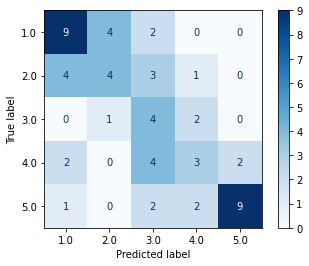

In [3415]:
plot_confusion_matrix(logreg, X_test, y_test, cmap='Blues', values_format='d');

# Experimenting w/features 16-20 

In [3416]:
sixteen_to_twenty_with_sal.corr()['2019-20'].sort_values(ascending=False)

2019-20           1.000000
sal_classified    0.941744
PTS               0.777871
FG                0.767685
FGA               0.747993
MP                0.738304
FT                0.706744
GS                0.697379
FTA               0.696733
2PA               0.684865
TOV               0.677175
2P                0.676427
AST               0.567211
STL               0.554729
DRB               0.544989
TRB               0.466665
3PA               0.428419
3P                0.423755
PF                0.376320
G                 0.323772
BLK               0.271867
FT%               0.246529
ORB               0.224346
3P%               0.157425
2P%               0.134902
eFG%              0.133224
FG%               0.128468
Rk               -0.018450
Age              -0.048687
Name: 2019-20, dtype: float64

In [3417]:
fit_models_and_score(logreg, sixteen_to_twenty_with_sal[['Age', 'PTS', 'FGA', 'STL', 'TRB', 'GS', 'TOV', 'FT', '3P', 'MP', '2P']], sixteen_to_twenty_with_sal['sal_classified'], 0.30)

train score is 0.6081081081081081
test score is 0.59375


(None, None)

# Feature Engineering

In [3418]:
features = ['G', 'GS', 'MP', 'FG',
       'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT',
       'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF',
       'PTS']
X = sixteen_to_twenty_with_sal[features]

In [3419]:
poly = PolynomialFeatures(include_bias=False)

In [3420]:
poly_features = poly.fit_transform(X)

In [3421]:
df_poly = pd.DataFrame(poly_features, columns=poly.get_feature_names(features))
df_poly

,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,...,BLK^2,BLK TOV,BLK PF,BLK PTS,TOV^2,TOV PF,TOV PTS,PF^2,PF PTS,PTS^2
0,71.2,61.2,30.36,5.26,11.78,0.4494,1.26,3.84,0.3154,4.04,...,0.4356,0.9768,1.3596,9.2268,2.1904,3.0488,20.6904,4.2436,28.7988,195.4404
1,71.4,70.2,31.04,5.54,11.26,0.4904,1.26,3.40,0.3676,4.28,...,1.4884,1.8300,2.4156,16.4944,2.2500,2.9700,20.2800,3.9204,26.7696,182.7904
2,62.2,51.4,27.40,2.90,7.38,0.3856,1.22,3.64,0.3306,1.68,...,0.2916,0.6372,0.9828,4.5252,1.3924,2.1476,9.8884,3.3124,15.2516,70.2244
3,53.4,9.4,21.16,3.48,8.44,0.4086,1.02,2.74,0.3626,2.44,...,0.0324,0.2052,0.2880,1.8540,1.2996,1.8240,11.7420,2.5600,16.4800,106.0900
4,71.2,27.2,20.30,3.38,6.74,0.5070,0.26,0.80,0.2720,3.10,...,0.9216,1.2672,2.5344,8.5632,1.7424,3.4848,11.7744,6.9696,23.5488,79.5664
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207,60.8,19.0,22.40,3.10,7.78,0.3932,2.12,5.68,0.3698,0.98,...,0.0100,0.0620,0.1240,0.8960,0.3844,0.7688,5.5552,1.5376,11.1104,80.2816
208,70.0,69.6,31.32,3.96,10.00,0.3966,2.20,5.98,0.3680,1.78,...,0.0400,0.2240,0.4200,2.3320,1.2544,2.3520,13.0592,4.4100,24.4860,135.9556
209,64.8,31.2,30.18,5.16,11.84,0.4358,1.66,4.54,0.3604,3.54,...,0.2704,0.8424,1.0088,7.3216,2.6244,3.1428,22.8096,3.7636,27.3152,198.2464
210,69.8,47.6,23.18,3.98,7.36,0.5460,0.00,0.04,0.1500,3.98,...,0.7056,0.8064,1.9656,7.8960,0.9216,2.2464,9.0240,5.4756,21.9960,88.3600


In [3422]:
twenty_sal = sixteen_to_twenty_with_sal['2019-20']

In [3423]:
df_poly['salary'] = twenty_sal

In [3424]:
u = df_poly.corr()['salary'].sort_values(ascending=False)

In [3425]:
u.sort_values(ascending=False)
#Idea of some of the features most highly correlated/will work in the model

salary      1.000000
GS PTS      0.804791
MP PTS      0.799904
GS FG       0.798205
MP FG       0.797308
              ...   
2P%^2       0.122320
FG% eFG%    0.118835
eFG%^2      0.118816
FG% 2P%     0.115947
FG%^2       0.104090
Name: salary, Length: 351, dtype: float64

# Scoring models with Polynomial Features 

In [3426]:
my_features = ['GS PTS',  
'MP PTS',      
'GS FG',       
'MP FG',     
'GS FGA',      
'MP FGA',    
'2P% PTS',]

In [3427]:
fit_models_and_score(logreg, df_poly[['GS PTS', 'MP PTS', 'GS FG', 'FG%^2', '3P']]
# 'FG PTS'      ,
# 'FGA FG%'     ,
# 'GS FT'       ,
# 'G PTS'       ,
# 'FG eFG%'     
                                     , sixteen_to_twenty_with_sal['sal_classified'], 0.30)

#Results are decent, but still not as good as results achieved with original features -- and with less interpretability

train score is 0.47297297297297297
test score is 0.546875


(None, None)

I'll incorporate the new dataframe (and others from past years) to try to raise my accuracy score

# Clustering

# Scoring Models on Created clusters for each dataframe

The clusters are found/created based on salary below, but will be scored here based on order of the notebook

In [3428]:
for index, i in enumerate(sixteen_to_twenty_with_sal['2019-20']):
    if i < 6500000:
        sixteen_to_twenty_with_sal.loc[index, 'sal_classified'] = 1
    elif i <= 13486300 and i >= 6825000:
           sixteen_to_twenty_with_sal.loc[index, 'sal_classified'] = 2
    elif i <= 21000000 and i >= 14000000:
           sixteen_to_twenty_with_sal.loc[index, 'sal_classified'] = 3
    elif i <= 29802321 and i >= 22615559:
           sixteen_to_twenty_with_sal.loc[index, 'sal_classified'] = 4
    else:
        sixteen_to_twenty_with_sal.loc[index, 'sal_classified'] = 5

#These classes are made using the clustering of the salary I did below. The goal is to see how they compare with the classes
#we made with the quartiles

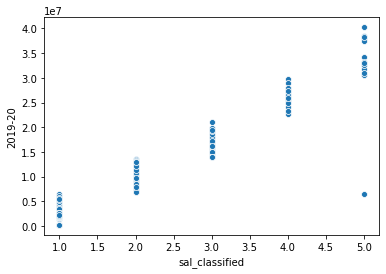

In [3429]:
sns.scatterplot(data=sixteen_to_twenty_with_sal, x='sal_classified', y='2019-20')

In [3430]:
fit_models_and_score(logreg, sixteen_to_twenty_with_sal[['Age', 'PTS', 'FGA', 'STL', 'TOV', '2P', '3P', 'GS', 'TRB', 'MP']], sixteen_to_twenty_with_sal['sal_classified'], 0.30)

train score is 0.6418918918918919
test score is 0.5625


(None, None)

In [3431]:
fit_models_and_score(knnc, sixteen_to_twenty_with_sal[['Age', 'PTS', 'FGA', 'STL', 'TOV', '2P', '3P', 'GS', 'TRB', 'MP']], sixteen_to_twenty_with_sal['sal_classified'], 0.30)

train score is 0.5945945945945946
test score is 0.40625


(None, None)

In [3432]:
for index, i in enumerate(fourteen_to_eighteen_with_sal['salary']):
    if i <= 4402546:
        fourteen_to_eighteen_with_sal.loc[index, 'sal_classified'] = 1
    elif i <= 9259260 and i >= 4666500:
           fourteen_to_eighteen_with_sal.loc[index, 'sal_classified'] = 2
    elif i <= 14814815 and i >= 9607500:
           fourteen_to_eighteen_with_sal.loc[index, 'sal_classified'] = 3
    elif i <= 21924719 and i >= 15400000:
           fourteen_to_eighteen_with_sal.loc[index, 'sal_classified'] = 4
    else:
        fourteen_to_eighteen_with_sal.loc[index, 'sal_classified'] = 5

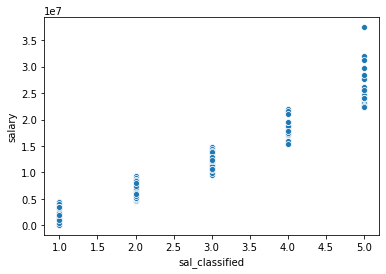

In [3433]:
sns.scatterplot(data=fourteen_to_eighteen_with_sal, x='sal_classified', y='salary')

In [3434]:
fit_models_and_score(logreg, fourteen_to_eighteen_with_sal[['Age', '3P%', 'FG', 'PTS', 'MP', 'GS', 'TRB', 'BLK', 'FT']], fourteen_to_eighteen_with_sal['sal_classified'], 0.30)

train score is 0.5081967213114754
test score is 0.32075471698113206


(None, None)

In [3435]:
fit_models_and_score(knnc, fourteen_to_eighteen_with_sal[['Age', '3P%', 'FG', 'PTS', 'MP', 'GS', 'TRB', 'BLK', 'FT']], fourteen_to_eighteen_with_sal['sal_classified'], 0.30)

train score is 0.5163934426229508
test score is 0.3018867924528302


(None, None)

In [3436]:
for index, i in enumerate(thirteen_to_seventeen_with_sal['salary']):
    if i <= 4264057:
        thirteen_to_seventeen_with_sal.loc[index, 'sal_classified'] = 1
    elif i <= 8550000 and i >= 4540525:
           thirteen_to_seventeen_with_sal.loc[index, 'sal_classified'] = 2
    elif i <= 13550000 and i >= 8800000:
           thirteen_to_seventeen_with_sal.loc[index, 'sal_classified'] = 3
    elif i <= 18735364 and i >= 14000000:
           thirteen_to_seventeen_with_sal.loc[index, 'sal_classified'] = 4
    else:
        thirteen_to_seventeen_with_sal.loc[index, 'sal_classified'] = 5

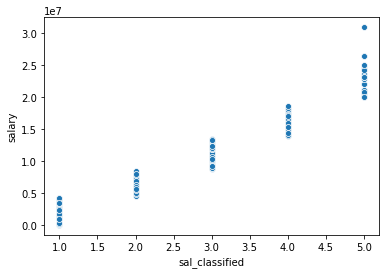

In [3437]:
sns.scatterplot(data=thirteen_to_seventeen_with_sal, x='sal_classified', y='salary')

In [3438]:
fit_models_and_score(logreg, thirteen_to_seventeen_with_sal[['MP', 'PTS', 'FG', 'FTA', '2P', 'GS']], thirteen_to_seventeen_with_sal['sal_classified'], 0.30)

train score is 0.4740740740740741
test score is 0.4745762711864407


(None, None)

In [3059]:
fit_models_and_score(knnc, thirteen_to_seventeen_with_sal[['MP', 'PTS', 'FG', 'FTA', '2P', 'GS']], thirteen_to_seventeen_with_sal['sal_classified'], 0.30)

train score is 0.5703703703703704
test score is 0.5254237288135594


(None, None)

# 16-20 Clusters

Above, I set the classes as the quartiles (20,40,60,80) in the dataset. In the following section, I'll group the salaries using clustering. Then, I'll run the classification models again using the clusters to create the classes. The models in which the classes are defined by the clusters are in the section above.

In [3060]:
ss = StandardScaler()

In [3061]:
sixteen_to_twenty_with_sal = sixteen_to_twenty_with_sal.drop(['sal_classified'],axis=1)
#Dropping what we want to be our target

In [3062]:
sixteen_to_twenty_with_sal = sixteen_to_twenty_with_sal[['2019-20']]
#Dropping unnecessary/non-numeric columns

In [3063]:
sixteen_to_twenty_with_sal_sc = ss.fit_transform(sixteen_to_twenty_with_sal)

In [3064]:
salary_model = KMeans(n_clusters=5, random_state=0).fit(sixteen_to_twenty_with_sal_sc)

In [3065]:
salary_model.labels_
#Predictions

array([2, 1, 4, 0, 0, 2, 1, 2, 1, 1, 0, 0, 0, 0, 0, 2, 3, 0, 2, 2, 1, 4,
       0, 4, 1, 0, 0, 1, 3, 0, 2, 2, 0, 4, 4, 4, 1, 4, 1, 1, 2, 4, 1, 4,
       4, 2, 2, 4, 1, 4, 4, 4, 2, 0, 4, 4, 0, 4, 0, 0, 2, 2, 4, 2, 2, 0,
       0, 2, 4, 1, 2, 3, 2, 1, 1, 2, 0, 0, 0, 0, 4, 0, 0, 0, 0, 4, 0, 0,
       0, 3, 2, 0, 0, 2, 4, 4, 0, 3, 0, 4, 4, 4, 2, 4, 4, 1, 2, 0, 0, 4,
       4, 1, 3, 4, 3, 2, 4, 1, 0, 3, 4, 0, 3, 0, 3, 1, 0, 4, 3, 4, 0, 1,
       0, 2, 4, 0, 0, 2, 2, 4, 4, 4, 0, 4, 3, 0, 0, 0, 2, 4, 0, 1, 1, 1,
       0, 4, 1, 4, 0, 4, 0, 4, 3, 3, 0, 0, 0, 2, 0, 2, 4, 0, 0, 0, 2, 1,
       3, 0, 1, 0, 4, 4, 0, 3, 1, 0, 4, 4, 4, 2, 0, 4, 0, 3, 4, 4, 0, 0,
       2, 0, 2, 0, 0, 4, 0, 2, 0, 4, 0, 4, 0, 2])

In [3066]:
centroids = salary_model.cluster_centers_
centroids

array([[-0.9793532 ],
       [ 1.3457335 ],
       [ 0.41081777],
       [ 2.09130168],
       [-0.25640446]])

In [3067]:
score = silhouette_score(sixteen_to_twenty_with_sal_sc, salary_model.labels_)
score

0.6226487935880093

In [3068]:
sixteen_to_twenty_with_sal['cluster'] = salary_model.labels_
sixteen_to_twenty_with_sal.head()

,2019-20,cluster
0,19863636,2
1,28000000,1
2,9258000,4
3,2320044,0
4,4160000,0


In [3069]:
sixteen_to_twenty_with_sal.groupby(['cluster']).describe()

2019-20                                                      \
          count          mean           std         min         25%   
cluster                                                               
0          74.0  2.911612e+06  1.694913e+06    196288.0   1882867.0   
1          27.0  2.654105e+07  1.601257e+06  22615559.0  25719198.5   
2          37.0  1.703967e+07  1.909799e+06  14000000.0  15450051.0   
3          17.0  3.411813e+07  3.066794e+06  30500000.0  32511623.0   
4          57.0  1.025881e+07  2.095512e+06   6825000.0   8349039.0   

                                             
                50%         75%         max  
cluster                                      
0         2532376.5   4691321.5   6500000.0  
1        27093019.0  27394815.0  29802321.0  
2        17000000.0  18539130.0  21000000.0  
3        32742000.0  37436858.0  40231758.0  
4        10116576.0  12100000.0  13486300.0

# 14-18 Clusters

In [3070]:
fourteen_to_eighteen_with_sal = fourteen_to_eighteen_with_sal.drop(['sal_classified'], axis=1)

In [3071]:
fourteen_to_eighteen_with_sal = fourteen_to_eighteen_with_sal[['salary']]
#Dropping unnecessary/non-numeric columns

In [3072]:
fourteen_to_eighteen_with_sal_sc = ss.fit_transform(fourteen_to_eighteen_with_sal)

In [3073]:
salary_model = KMeans(n_clusters=5, random_state=0).fit(fourteen_to_eighteen_with_sal_sc)

In [3074]:
salary_model.labels_
#Predictions

array([1, 3, 2, 3, 0, 4, 0, 3, 2, 2, 0, 1, 0, 0, 3, 2, 2, 4, 1, 2, 1, 0,
       0, 3, 1, 2, 1, 2, 1, 0, 1, 2, 0, 1, 3, 2, 2, 3, 2, 1, 3, 2, 1, 4,
       4, 3, 0, 0, 2, 3, 4, 0, 1, 2, 4, 3, 4, 2, 4, 2, 1, 1, 3, 0, 4, 3,
       0, 2, 2, 0, 2, 0, 3, 2, 2, 4, 0, 2, 3, 2, 4, 4, 0, 0, 3, 0, 4, 3,
       0, 1, 4, 3, 3, 0, 3, 4, 4, 1, 0, 4, 2, 2, 4, 4, 2, 0, 2, 2, 4, 1,
       3, 2, 2, 3, 3, 3, 3, 3, 3, 1, 2, 0, 2, 0, 3, 2, 1, 0, 2, 2, 3, 4,
       4, 1, 0, 0, 0, 0, 4, 3, 3, 2, 4, 4, 0, 4, 0, 2, 2, 3, 2, 1, 1, 3,
       3, 2, 3, 4, 4, 0, 4, 3, 0, 2, 4, 0, 0, 0, 3, 4, 2, 2, 4, 0, 3])

In [3075]:
centroids = salary_model.cluster_centers_
centroids

array([[-1.16439606],
       [ 1.82994048],
       [-0.58167734],
       [ 0.08792901],
       [ 0.85641427]])

In [3076]:
score = silhouette_score(fourteen_to_eighteen_with_sal_sc, salary_model.labels_)
score

0.5737149120220946

In [3077]:
fourteen_to_eighteen_with_sal['cluster'] = salary_model.labels_
fourteen_to_eighteen_with_sal.head()

,salary,cluster
0,27734406.0,1
1,10000000.0,3
2,7319035.0,2
3,10845506.0,3
4,4187599.0,0


In [3078]:
salary_model.labels_
#Predictions

array([1, 3, 2, 3, 0, 4, 0, 3, 2, 2, 0, 1, 0, 0, 3, 2, 2, 4, 1, 2, 1, 0,
       0, 3, 1, 2, 1, 2, 1, 0, 1, 2, 0, 1, 3, 2, 2, 3, 2, 1, 3, 2, 1, 4,
       4, 3, 0, 0, 2, 3, 4, 0, 1, 2, 4, 3, 4, 2, 4, 2, 1, 1, 3, 0, 4, 3,
       0, 2, 2, 0, 2, 0, 3, 2, 2, 4, 0, 2, 3, 2, 4, 4, 0, 0, 3, 0, 4, 3,
       0, 1, 4, 3, 3, 0, 3, 4, 4, 1, 0, 4, 2, 2, 4, 4, 2, 0, 2, 2, 4, 1,
       3, 2, 2, 3, 3, 3, 3, 3, 3, 1, 2, 0, 2, 0, 3, 2, 1, 0, 2, 2, 3, 4,
       4, 1, 0, 0, 0, 0, 4, 3, 3, 2, 4, 4, 0, 4, 0, 2, 2, 3, 2, 1, 1, 3,
       3, 2, 3, 4, 4, 0, 4, 3, 0, 2, 4, 0, 0, 0, 3, 4, 2, 2, 4, 0, 3])

In [3079]:
fourteen_to_eighteen_with_sal.groupby(['cluster']).describe()

salary                                                       \
         count          mean           std         min          25%   
cluster                                                               
0         39.0  2.140777e+06  1.342607e+06     57672.0   1033328.50   
1         22.0  2.601231e+07  3.787629e+06  22471910.0  23786560.75   
2         44.0  6.786344e+06  1.303334e+06   4666500.0   5510135.50   
3         38.0  1.212460e+07  1.560350e+06   9607500.0  10633928.75   
4         32.0  1.825114e+07  1.703914e+06  15400000.0  17175287.00   

                                             
                50%         75%         max  
cluster                                      
0         1933941.0   3431510.0   4402546.0  
1        24378399.0  27361744.5  37457154.0  
2         7059825.0   7607601.5   9259260.0  
3        12280736.0  13396067.5  14814815.0  
4        18076868.5  19042450.0  21924719.0

# 13-17 Clusters

In [3080]:
thirteen_to_seventeen_with_sal = thirteen_to_seventeen_with_sal.drop(['sal_classified'], axis=1)

In [3081]:
thirteen_to_seventeen_with_sal = thirteen_to_seventeen_with_sal[['salary']]

In [3082]:
thirteen_to_seventeen_with_sal_sc = ss.fit_transform(thirteen_to_seventeen_with_sal)

In [3083]:
salary_model = KMeans(n_clusters=5, random_state=0).fit(thirteen_to_seventeen_with_sal_sc)

In [3084]:
centroids = salary_model.cluster_centers_
centroids

array([[ 0.22543865],
       [ 0.98034916],
       [-0.47528564],
       [-1.09281043],
       [ 1.96759237]])

In [3085]:
score = silhouette_score(thirteen_to_seventeen_with_sal_sc, salary_model.labels_)
score

0.5759234671124688

In [3086]:
thirteen_to_seventeen_with_sal['cluster'] = salary_model.labels_
thirteen_to_seventeen_with_sal.head()

,salary,cluster
0,2700000.0,3
1,26540100.0,4
2,10314532.0,0
3,7680965.0,2
4,10154495.0,0


In [3087]:
thirteen_to_seventeen_with_sal.groupby(['cluster']).describe()

salary                                                      \
         count          mean           std         min         25%   
cluster                                                              
0         41.0  1.117592e+07  1.385911e+06   8800000.0  10154495.0   
1         30.0  1.631175e+07  1.293635e+06  14000000.0  15330435.0   
2         51.0  6.408738e+06  1.133252e+06   4540525.0   5502809.0   
3         51.0  2.207577e+06  1.437004e+06     57672.0   1050961.0   
4         21.0  2.302819e+07  2.648266e+06  20072033.0  21165675.0   

                                             
                50%         75%         max  
cluster                                      
0        11131368.0  12250000.0  13550000.0  
1        16528509.0  17145838.0  18735364.0  
2         6286408.0   7357500.0   8550000.0  
3         2194500.0   3540166.5   4264057.0  
4        22116750.0  24328425.0  30963450.0

# Visualizing Clusters and Original Classifications

Data Viz here